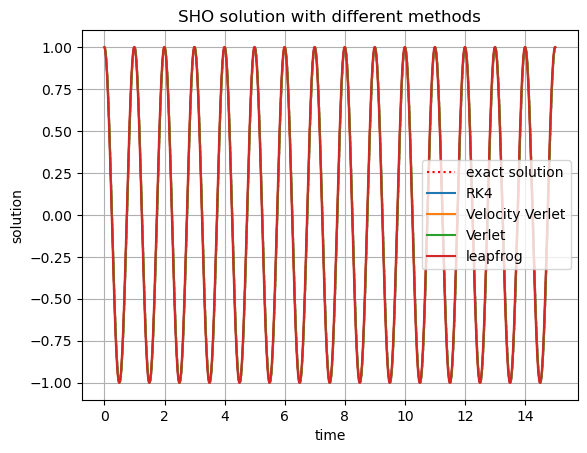

In [130]:
# Q1
# part A

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# defining functions

#-------------------------------- RK4 --------------------------------------
def rk4(x, v, dt, a_func, t):
    """
    RK4 for second-order ODE by rewriting as first-order system:
    dx/dt = v
    dv/dt = a(x, t)
    """
    k1_x = v
    k1_v = a_func(x, t)
    
    k2_x = v + 0.5 * dt * k1_v
    k2_v = a_func(x + 0.5 * dt * k1_x, t + 0.5 * dt)
    
    k3_x = v + 0.5 * dt * k2_v
    k3_v = a_func(x + 0.5 * dt * k2_x, t + 0.5 * dt)
    
    k4_x = v + dt * k3_v
    k4_v = a_func(x + dt * k3_x, t + dt)
    
    x_next = x + (dt / 6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
    v_next = v + (dt / 6) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)
    
    return x_next, v_next


#-------------------------------- verlet --------------------------------------
def verlet(x_now, x_prev, a_now, dt):
    """
    Verlet position update (velocity not included).
    
    Parameters:
    x_now : current position
    x_prev : previous position
    a_now : current acceleration
    dt : time step

    Returns:
    x_next : position at next time step
    """
    return 2 * x_now - x_prev + a_now * dt**2


#-------------------------------- velocity verlet --------------------------------------
def velocity_verlet(x, v, a, dt, a_func, t):
    """
    Velocity-Verlet position and velocity update.
    
    Parameters:
    x : current position
    v : current velocity
    a : current acceleration
    dt : time step
    a_func : function to compute acceleration a(x, t)
    t : current time

    Returns:
    x_next : updated position
    v_next : updated velocity
    a_next : updated acceleration
    """
    x_next = x + v * dt + 0.5 * a * dt**2
    a_next = a_func(x_next, t + dt)
    v_next = v + 0.5 * (a + a_next) * dt
    return x_next, v_next, a_next


#-------------------------------- leapfrog --------------------------------------
def leapfrog(x, v_half, a, dt):
    """
    Leapfrog integration method.
    
    Parameters:
    x : current position
    v_half : velocity at half-step (v at t - dt/2)
    a : current acceleration
    dt : time step

    Returns:
    x_next : updated position
    v_half_next : updated velocity at next half-step
    """
    v_half_next = v_half + a * dt
    x_next = x + v_half_next * dt
    return x_next, v_half_next


#------------------------ velocity and acceleration func -----------------
def y_slope(p,t):
    return p

def p_slope(y,t):
    return -4*(np.pi**2)*y

# substition
h = 0.01    # time step
t0 = 0 
tf = 15
y_0 = 1     #intital position
p_0 = 0     #intial velocity

# temporal grid points
ts = np.arange(t0, tf + h, h)


# exact solution
ys_exact = np.cos(2*np.pi*ts)


############################ RK4 solving loop ###################################
y = y_0
v = p_0
ys_rk4 = np.zeros(len(ts))

for i in range(len(ts)-1):
    t = ts[i]
    ys_rk4[i] = y  
    y, v = rk4(y, v, h, p_slope, t)

ys_rk4[-1] = y  # adding last value 


############################ verlet solving loop ###################################
y = y_0
a = p_slope(y, ts[0])
y_prev = y - p_0*h + 0.5*a*(h**2)    # taylore expansion as, y(t - dt) = y(t) -dt.d/dt(y(t)) +(1/2).dt^2.d2/dt2(y(t)) + ....
ys_v = np.zeros(len(ts))

for i in range(len(ts)-1):
    ys_v[i] = y  
    y = verlet(y, y_prev, a, h)
    y_prev = ys_v[i]
    a = p_slope(y,ts[i])  # acceleration at new position
    
ys_v[-1] = y  # adding last value 
 

############################ velocity_verlet solving loop ###################################
y = y_0
v = p_0
a = p_slope(y,ts[0])
ys_vv = np.zeros(len(ts))

for i in range(len(ts)-1):
    t = ts[i]
    ys_vv[i] = y  
    y, v, a = velocity_verlet(y, v, a, h, p_slope, t)

ys_vv[-1] = y  # adding last value 


############################ leapfrog solving loop ###################################
y = y_0
v = p_0
a = p_slope(y, ts[0])
v_half = v + 0.5 * a * h
ys_lf = np.zeros(len(ts))

for i in range(len(ts)-1):
    ys_lf[i] = y
    y, v_half = leapfrog(y, v_half, a, h)
    a = p_slope(y, ts[i])  # acceleration at new position

ys_lf[-1] = y  # adding last value 



# plotting
plt.plot(ts, ys_exact, label ='exact solution', color = 'Red', linestyle ='dotted')
plt.plot(ts, ys_rk4, label ='RK4')
plt.plot(ts, ys_vv, label ='Velocity Verlet')
plt.plot(ts, ys_v, label ='Verlet')
plt.plot(ts, ys_lf, label ='leapfrog')
plt.xlabel('time')
plt.ylabel('solution')
plt.title('SHO solution with different methods')
plt.grid()
plt.legend()
plt.show()

h               error(RK4)      error(Verlet)   error(Velocity Verlet) error(Leapfrog)     
-------------------------------------------------------------------------------------
1.0e-04      2.442e-15            1.259e-11            1.223e-12            9.753e-10           
1.6e-04      1.021e-14            1.546e-09            1.552e-09            4.004e-07           
2.5e-04      1.521e-14            1.432e-08            1.432e-08            2.332e-06           
4.0e-04      9.770e-15            4.354e-08            4.354e-08            4.507e-06           
6.3e-04      1.820e-13            1.492e-07            1.492e-07            9.857e-06           
1.0e-03      6.402e-12            1.202e-08            1.202e-08            9.861e-07           
1.6e-03      1.488e-11            2.557e-06            2.557e-06            6.989e-05           
2.5e-03      3.391e-10            6.538e-06            6.538e-06            1.197e-04           
4.0e-03      5.099e-09            1.349e-05   

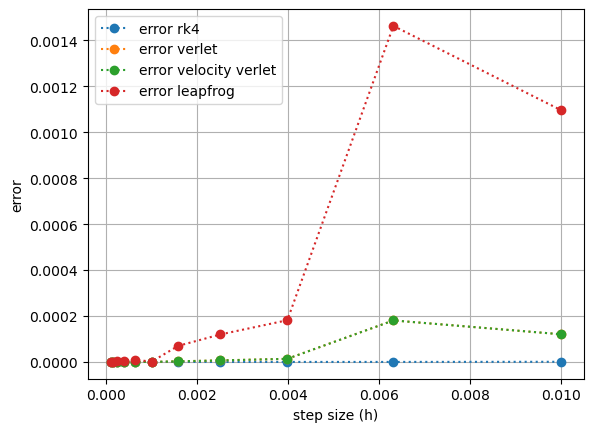

In [131]:
# Q1
# part B

n = np.arange(-4, -2 + 0.2, 0.2)  # Steps from -4 to -2
hs = [10**i for i in n]

print(f"{'h':<15} {'error(RK4)':<15} {'error(Verlet)':<15} {'error(Velocity Verlet)':<15} {'error(Leapfrog)':<20}")
print("-" * 85)




error_rk4_final_pt = np.zeros(len(hs))
error_v_final_pt = np.zeros(len(hs))
error_vv_final_pt = np.zeros(len(hs))
error_lf_final_pt = np.zeros(len(hs))


for k in range(len(hs)):
    h = hs[k]
    ts = np.arange(t0, tf + h, h)  # Proper endpoint to include tf
    ys_exact = np.cos(2*np.pi*ts)

    
    # RK4 method
    y = y_0
    v = p_0
    ys_rk4 = np.zeros(len(ts))
    for i in range(len(ts)-1):
        t = ts[i]
        ys_rk4[i] = y  
        y, v = rk4(y, v, h, p_slope, t)
    ys_rk4[-1] = y 

    
    # verlet method
    y = y_0
    a = p_slope(y, ts[0])
    y_prev = y - p_0*h + 0.5*a*(h**2)   
    ys_v = np.zeros(len(ts))
    for i in range(len(ts)-1):
        ys_v[i] = y  
        y = verlet(y, y_prev, a, h)
        y_prev = ys_v[i]
        a = p_slope(y,ts[i])  
    ys_v[-1] = y   
    
    
    # velocity verlet method
    y = y_0
    v = p_0
    a = p_slope(y,ts[0])
    ys_vv = np.zeros(len(ts))
    for i in range(len(ts)-1):
        t = ts[i]
        ys_vv[i] = y  
        y, v, a = velocity_verlet(y, v, a, h, p_slope, t)
    ys_vv[-1] = y  
    
    
    # leapfrog method
    y = y_0
    v = p_0
    a = p_slope(y, ts[0])
    v_half = v + 0.5 * a * h
    ys_lf = np.zeros(len(ts))
    for i in range(len(ts)-1):
        ys_lf[i] = y
        y, v_half = leapfrog(y, v_half, a, h)
        a = p_slope(y, ts[i])  
    ys_lf[-1] = y  
    
    
    
    
    # Compute errors
    error_rk4 = abs(ys_exact[-1] - ys_rk4[-1])
    error_v = abs(ys_exact[-1] - ys_v[-1])
    error_vv = abs(ys_exact[-1] - ys_vv[-1])
    error_lf = abs(ys_exact[-1] - ys_lf[-1])
    
    error_rk4_final_pt[k] = error_rk4
    error_v_final_pt[k] = error_v
    error_vv_final_pt[k] = error_vv
    error_lf_final_pt[k] = error_lf
    
    print(f"{h:<12.1e} {error_rk4:<20.3e} {error_v:<20.3e} {error_vv:<20.3e} {error_lf:<20.3e}")

    
#plotting
plt.plot(hs, error_rk4_final_pt,':o', label = 'error rk4')
plt.plot(hs, error_v_final_pt, ':o', label = 'error verlet')
plt.plot(hs, error_vv_final_pt, ':o', label = 'error velocity verlet')
plt.plot(hs, error_lf_final_pt, ':o', label = 'error leapfrog')
plt.xlabel('step size (h)')
plt.ylabel('error')
plt.legend()
plt.grid()
plt.show()

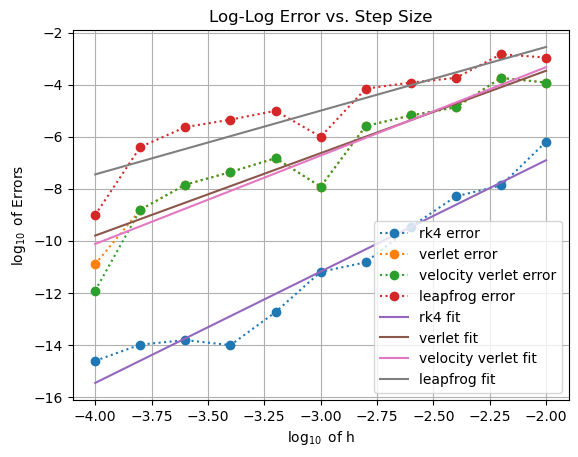

slope of liear fit for rk4 method is  4.278409165014943
slope of liear fit for verlet method is  3.1673310500028906
slope of liear fit for velocity verlet method is  3.397122832060318
slope of liear fit for leapfrog method is  2.4489017202527417

therefore the best method is rk4 method


In [132]:
# Q1
# part C



log_hs = np.log10(hs)
log_error_rk4 = np.log10(error_rk4_final_pt)
log_error_v = np.log10(error_v_final_pt)
log_error_vv = np.log10(error_vv_final_pt)
log_error_lf = np.log10(error_lf_final_pt)

### linear curve fit

# Define the fitting function
def l(x, p0, p1):
    return p0 * x + p1

# Fit the data
params_rk4, _ = curve_fit(l,log_hs , log_error_rk4, p0=[1.0, 1.0])
params_v, _ = curve_fit(l, log_hs, log_error_v, p0=[1.0, 1.0])
params_vv, _ = curve_fit(l, log_hs, log_error_vv, p0=[1.0, 1.0])
params_lf, _ = curve_fit(l, log_hs, log_error_lf, p0=[1.0, 1.0])


#plotting

plt.plot(log_hs,log_error_rk4,':o', label='rk4 error ')
plt.plot(log_hs, log_error_v,':o', label = 'verlet error' )
plt.plot(log_hs, log_error_vv,':o', label = 'velocity verlet error' )
plt.plot(log_hs, log_error_lf,':o', label = 'leapfrog error' )

plt.plot(log_hs, l(log_hs, params_rk4[0], params_rk4[1]), label ='rk4 fit')
plt.plot(log_hs, l(log_hs, params_v[0], params_v[1]), label ='verlet fit')
plt.plot(log_hs, l(log_hs, params_vv[0], params_vv[1]), label ='velocity verlet fit')
plt.plot(log_hs, l(log_hs, params_lf[0], params_lf[1]), label ='leapfrog fit')
plt.xlabel(r"$\log_{10}$ of h")
plt.ylabel(r"$\log_{10}$ of Errors")
plt.title("Log-Log Error vs. Step Size")

plt.legend()
plt.grid()
plt.show()



"""
efficinecy of the method, comparing the slope, the one with highest slope has the best accuracy!
      which method is best ???
      
"""

method_name = ['rk4 method', 'verlet method','velocity verlet method','leapfrog method']
method_slope = [params_rk4[0],params_v[0],params_vv[0],params_lf[0]]
                
def best_method(method_name, method_slope):
    best_slope = max(method_slope)
    for i in range(len(method_slope)):
        if best_slope == method_slope[i]:
            return method_name[i]

print('slope of liear fit for rk4 method is ',params_rk4[0])
print('slope of liear fit for verlet method is ',params_v[0])
print('slope of liear fit for velocity verlet method is ',params_vv[0])
print('slope of liear fit for leapfrog method is ',params_lf[0])
print('\n'+'therefore the best method is',best_method(method_name, method_slope))

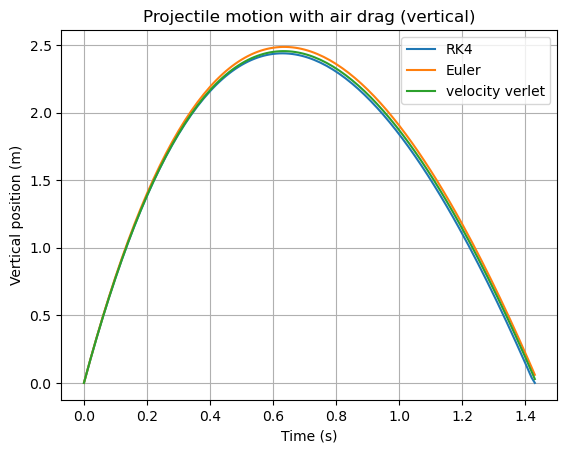

In [133]:
# Q2 
# part B

import numpy as np
import matplotlib.pyplot as plt

# --------------------- defining functions ---------------------
def y_slope(v, t):   # y slope w.r.t time => velocity
    return v

def v_slope(v, t):    # v slope w.r.t time => acceleration
    return -g - (gamma / m) * v


# --------------------- Parameters ---------------------
m = 2                   # mass in kg
v0 = 10                 # initial speed in m/s
theta = np.pi / 3       # launch angle (rad)
g = 9.8                 # gravity (m/s^2)
gamma = 2               # drag coefficient (kg/s)

# Decompose initial velocity
v_y0 = v0 * np.sin(theta)  # vertical component
y0 = 0  # origin

# Time parameters
h = 0.01  # time step
t0 = 0
tf = 20
ts = np.arange(t0, tf + h, h)  # temporal grid points



#------------------------ Euler solving loop ----------------------

ys_euler = np.zeros(len(ts))
y = y0
v = v_y0
i = 0
while i < len(ts) and y >= 0:
    t = ts[i]
    ys_euler[i] = y
    
    y = y + h*y_slope(v,t)
    v = v + h*v_slope(v,t)
    
    i += 1


#---------------------------- RK4 solving loop -------------------------

def rk4(x, v, dt, a_func, t):
    """
    RK4 for second-order ODE by rewriting as first-order system:
    dx/dt = v
    dv/dt = a(x, t)
    """
    k1_x = v
    k1_v = a_func(v, t)
    
    k2_x = v + 0.5 * dt * k1_v
    k2_v = a_func(v + 0.5 * dt * k1_x, t + 0.5 * dt)
    
    k3_x = v + 0.5 * dt * k2_v
    k3_v = a_func(v + 0.5 * dt * k2_x, t + 0.5 * dt)
    
    k4_x = v + dt * k3_v
    k4_v = a_func(v + dt * k3_x, t + dt)
    
    x_next = x + (dt / 6) * (k1_x + 2 * k2_x + 2 * k3_x + k4_x)
    v_next = v + (dt / 6) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)
    
    return x_next, v_next
ys_rk4 = np.zeros(len(ts))
y = y0
v = v_y0
i = 0
while i < len(ts) and y >= 0:
    t = ts[i]
    ys_rk4[i] = y
    y, v = rk4(y, v, h, v_slope, t)
    i += 1


#--------------------------- velocity verlet solving loop -----------------------
def velocity_verlet(x, v, a, dt, a_func, t):
    x_next = x + v * dt + 0.5 * a * dt**2
    v_temp = v + a * dt  # predict new temperary velocity
    a_next = a_func(v_temp, t + dt)  # compute a_next from new velocity
    v_next = v + 0.5 * (a + a_next) * dt
    return x_next, v_next, a_next

ys_vv = np.zeros(len(ts))
y = y0
v = v_y0
a = v_slope(v_y0,ts[0])
i = 0
while i < len(ts) and y >= 0:
    t = ts[i]
    ys_vv[i] = y
    y,v,a = velocity_verlet(y, v, a, h, v_slope, t)
    i += 1
    



# --------------------- Plotting ---------------------
plt.plot(ts[:i], ys_rk4[:i], label="RK4")
plt.plot(ts[:i], ys_euler[:i], label="Euler")
plt.plot(ts[:i], ys_vv[:i], label="velocity verlet")
plt.xlabel("Time (s)")
plt.ylabel("Vertical position (m)")
plt.title("Projectile motion with air drag (vertical)")
plt.grid()
plt.legend()
plt.show()

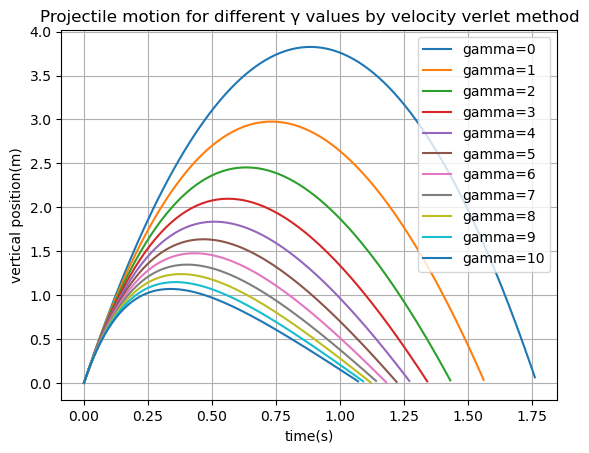

In [135]:
# Q2
# part c

gamma_list = list(range(11))  # γ = 0 to 10

for j in gamma_list:
    gamma = j
    ys_vv = np.zeros(len(ts))
    y = y0
    v = v_y0
    a = v_slope(v_y0, ts[0])
    i = 0
    while i < len(ts) and y >= 0:
        t = ts[i]
        ys_vv[i] = y
        y, v, a = velocity_verlet(y, v, a, h, v_slope, t)
        i += 1
    plt.plot(ts[:i], ys_vv[:i], label=f"gamma={j}")

plt.grid()
plt.xlabel('time(s)')
plt.ylabel('vertical position(m)')
plt.title("Projectile motion for different γ values by velocity verlet method")
plt.legend()
plt.show()